In [1]:
#@author: Ananya

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

In [2]:
os.chdir("C:/Users/aneogy/Desktop/ML-Practise")
df = pd.read_csv('avocado.csv')
warnings.filterwarnings("ignore")

In [3]:
# How does the data look?
print(df.shape)
df.columns

(18249, 14)


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
#Altering the display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Understanding the description of the dataset
print(df.describe())
pd.isnull(df).sum()

         Unnamed: 0  AveragePrice  Total Volume          4046          4225          4770    Total Bags    Small Bags    Large Bags    XLarge Bags          year
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000
50%       24.000000      1.370000 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
#Dropping unusuable columns
df_new = df.drop(['Unnamed: 0'], axis = 1)
df_new.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'], dtype='object')

In [6]:
# convert Date column's format;

df_new['Date'] =pd.to_datetime(df_new.Date)
df_new.sort_values(by=['Date'], inplace=True, ascending=True)
df_new.head()

Date  AveragePrice  Total Volume     4046      4225     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year              region
11569 2015-01-04          1.75      27365.89  9307.34   3844.81   615.28    13598.46    13061.10      537.36          0.0       organic  2015           Southeast
9593  2015-01-04          1.49      17723.17  1189.35  15628.27     0.00      905.55      905.55        0.00          0.0       organic  2015             Chicago
10009 2015-01-04          1.68       2896.72   161.68    206.96     0.00     2528.08     2528.08        0.00          0.0       organic  2015  HarrisburgScranton
1819  2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70    14925.18    11264.80     3660.38          0.0  conventional  2015          Pittsburgh
9333  2015-01-04          1.64       1505.12     1.27   1129.50     0.00      374.35      186.67      187.68          0.0       organic  2015               Boise

In [7]:
df_new.rename(columns={'Total Volume': 'Total_Volume', 'Total Bags': 'Total_Bags', 'Small Bags': 'Small_Bags', 'Large Bags':'Large_Bags', 'XLarge Bags': 'XL_Bags'}, inplace=True)
df_new.columns

Index(['Date', 'AveragePrice', 'Total_Volume', '4046', '4225', '4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XL_Bags', 'type', 'year', 'region'], dtype='object')

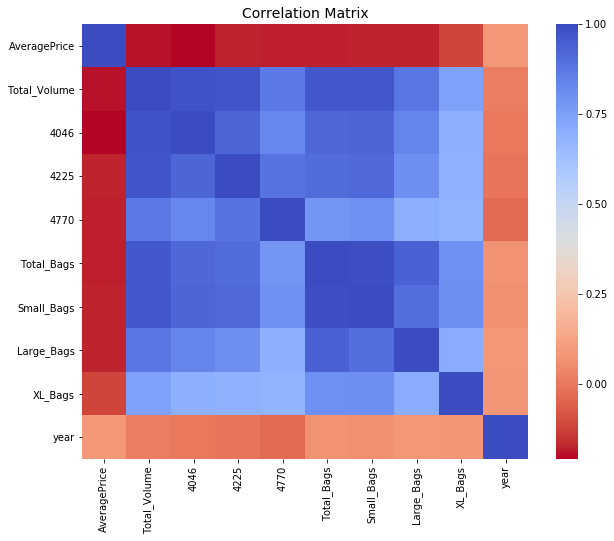

In [8]:
#Heat map
f, ax = plt.subplots(1, 1, figsize=(10,8))
corr = df_new.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

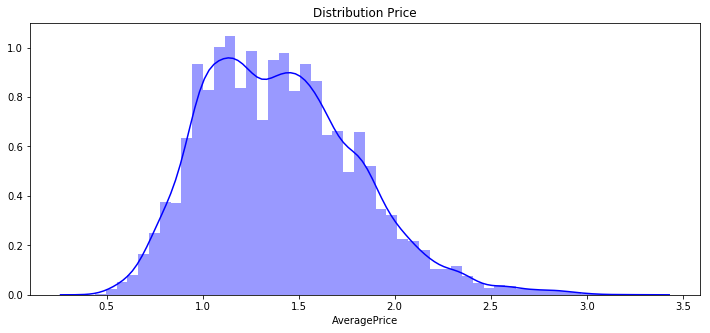

In [9]:
#Distribution of the avocado prices

plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(df_new["AveragePrice"], color ='b')

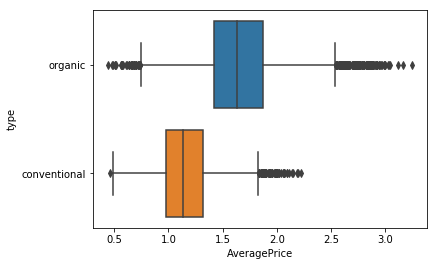

In [10]:
#Boxplot of the avocado prices by type

sns.boxplot(y="type", x="AveragePrice", data=df_new)

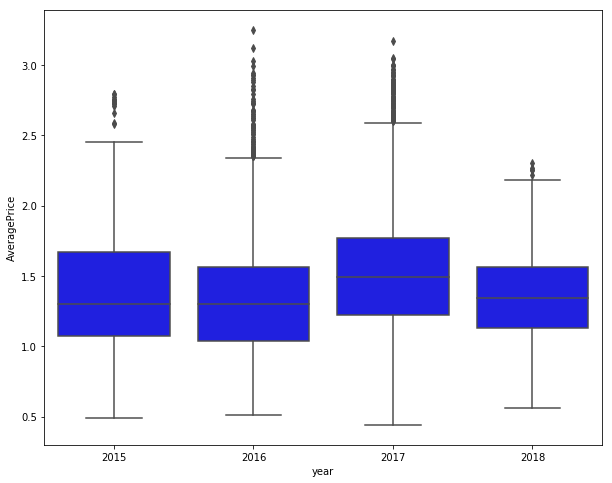

In [11]:
#Boxplot of the avocado prices by year

fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.boxplot(x='year', y='AveragePrice', data=df_new, color='blue')

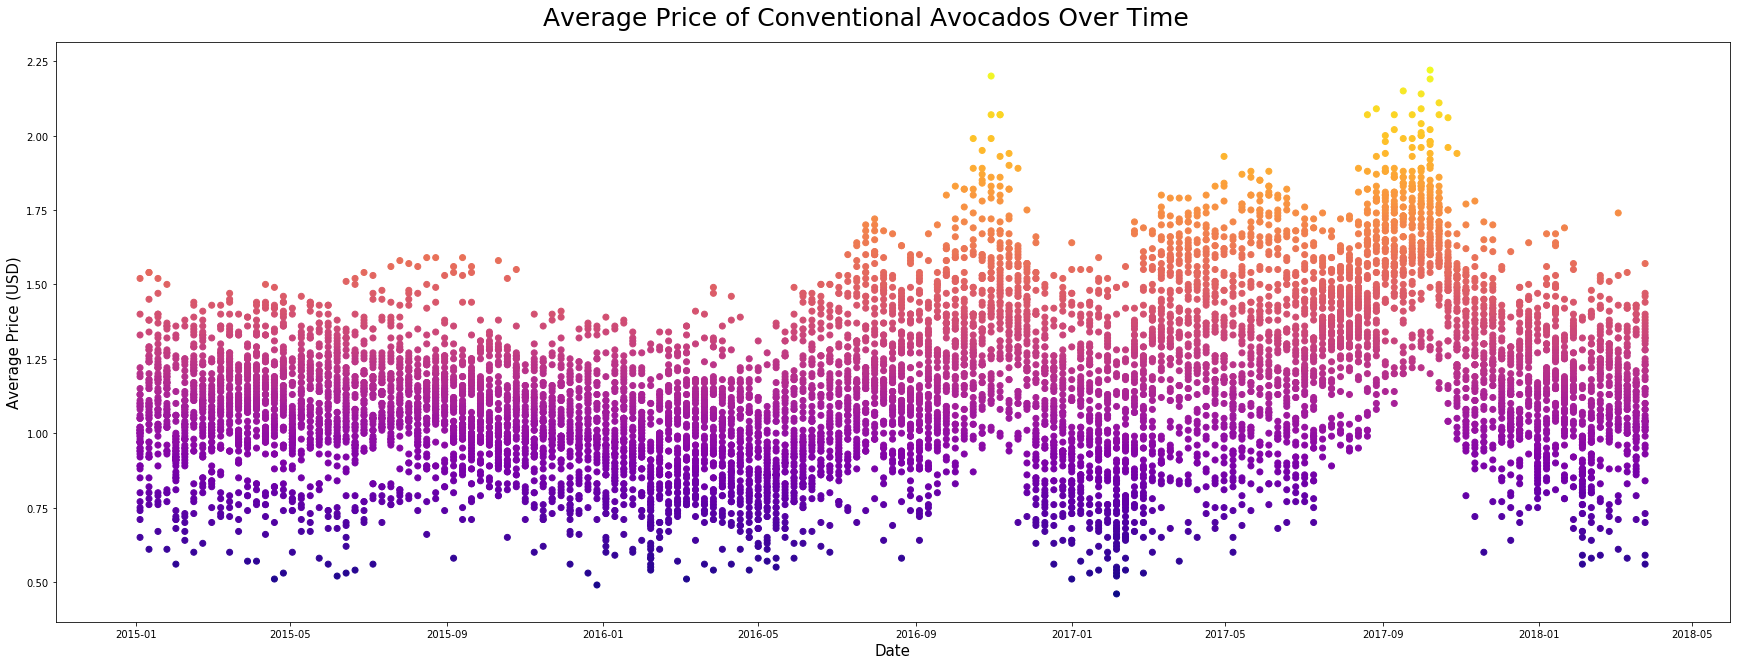

In [12]:
#Trend Analysis of Average price of avocados over the years and for each type Average price of Conventional Avocados over time

mask = df_new['type'] == 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (30, 10))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df_new[mask]['Date'].tolist()
avgPrices = df_new[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

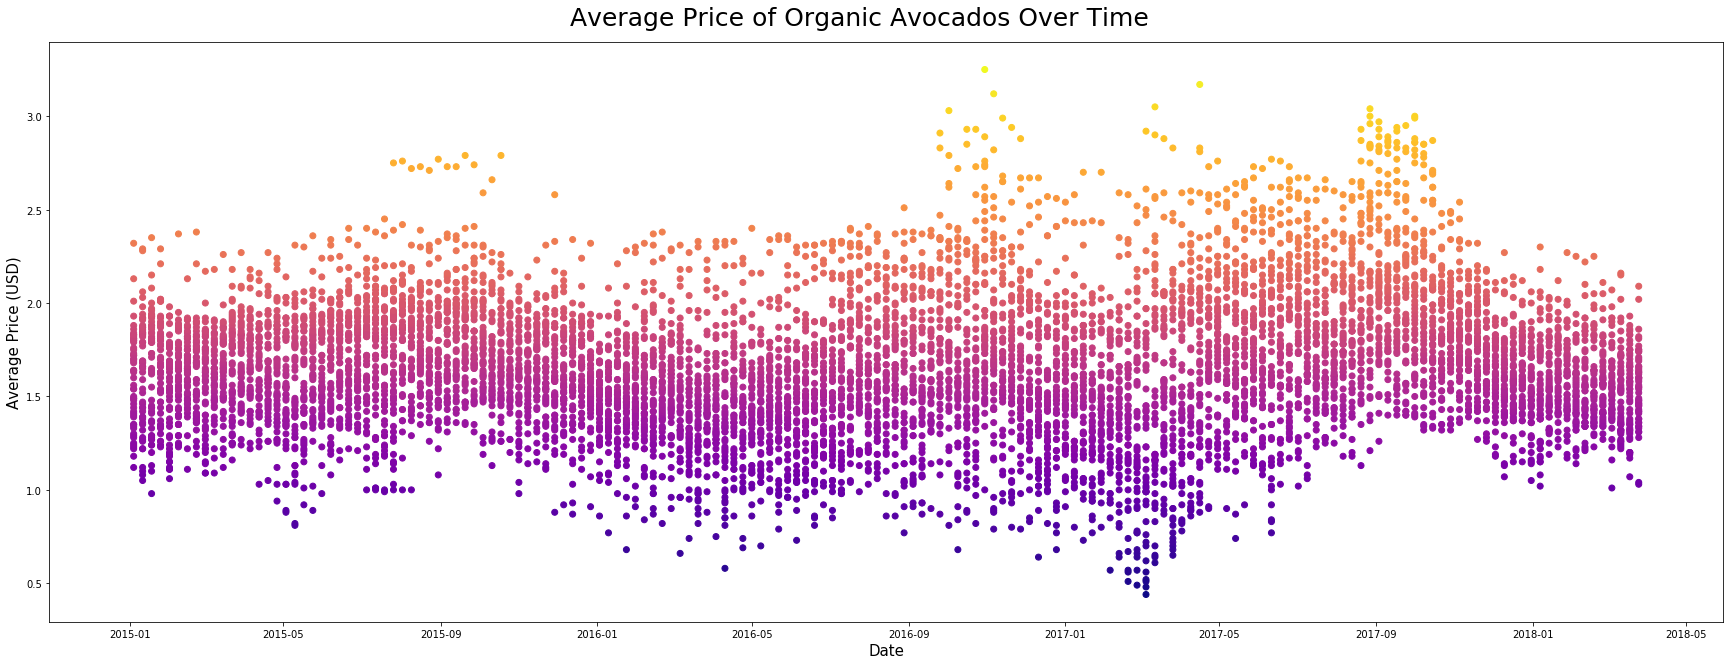

In [13]:
# Average price of Organic Avocados over time
mask = df_new['type'] == 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (30, 10))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df_new[mask]['Date'].tolist()
avgPrices = df_new[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

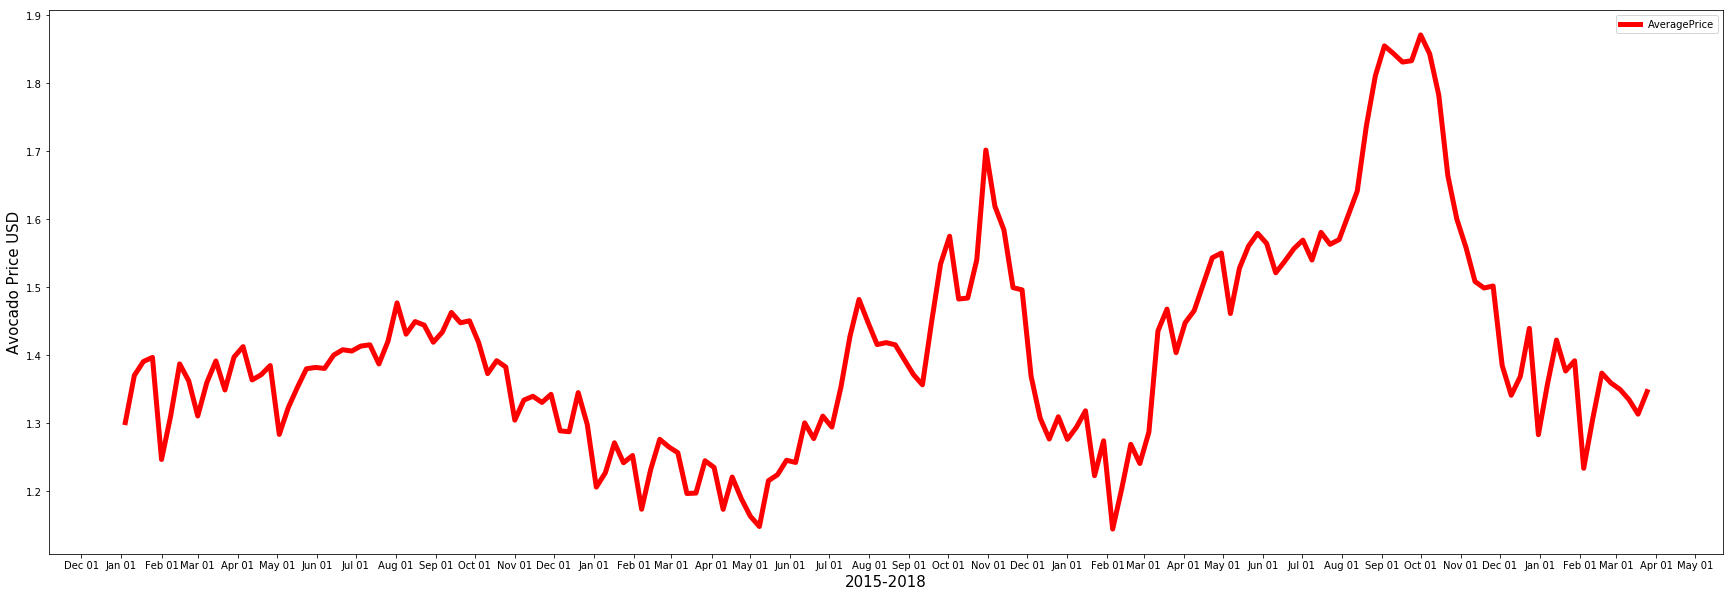

In [14]:
# Time Series Analysis Analysing time series data 

data_ori2 = df_new[['Date', 'AveragePrice']]
data_ori2 = data_ori2.set_index('Date')

weekly_df = data_ori2.resample('W').mean()
w_df = weekly_df.reset_index().dropna()

w_df.sort_values(by=['Date'])
w_df.head()

#See how the average prices per week varies by month over the years 2015-2018
import matplotlib.dates as mdates
fig = plt.figure(figsize = (30, 10))
ax = plt.axes()

#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(w_df['Date'],w_df['AveragePrice'],color='r', linewidth=5)
plt.xlabel("2015-2018", fontsize = 15)
plt.ylabel("Avocado Price USD", fontsize = 15)
plt.legend()
plt.show()

In [15]:
# distribution of total bags of avocado type = convential across various region over time

def aggregate_reg_tb(df_new):
    df_new['Total_Bags'] = df_new['Total_Bags'].astype(np.float32)
    aggregate_amt = df_new.groupby(['region', 'year']).mean()['Total_Bags']
    aggregate_amt = aggregate_amt.transpose()
    aggregate_amt.columns = ['region','year','Total_Bags']

    return aggregate_amt

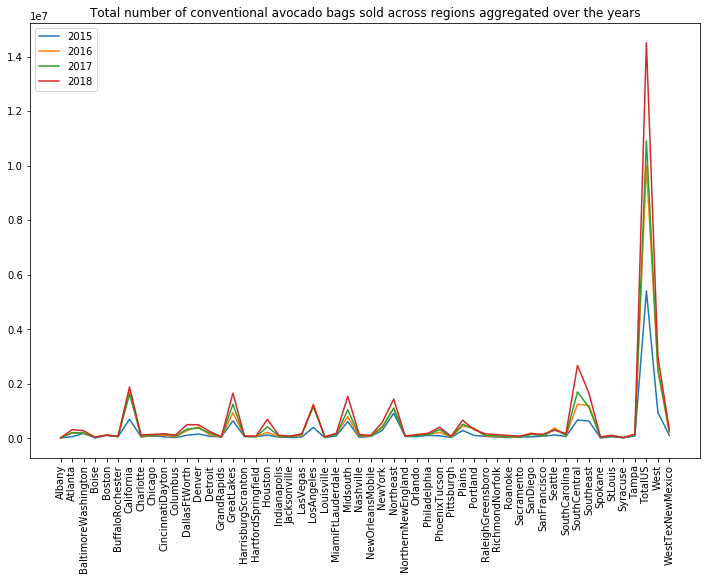

In [55]:
# Calling the functionfor avocado type 'conventional'

df_new_c = df_new[df_new['type'] == 'conventional']
agg_amt_reg_c = aggregate_reg_tb(df_new_c)
agg_amt_reg_c = agg_amt_reg_c.unstack()

fig = plt.figure(figsize = (12, 8))
plt.plot(agg_amt_reg_c)
plt.legend(agg_amt_reg_c.columns)
plt.xticks(rotation = 90)
plt.title('Total number of conventional avocado bags sold across regions aggregated over the years')
plt.show()

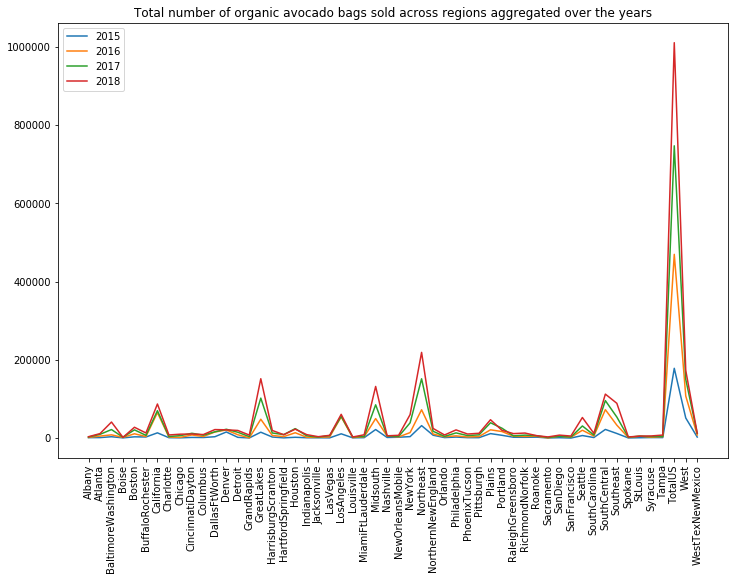

In [54]:
# Calling the functionfor avocado type 'organic'
df_new_r = df_new[df_new['type'] == 'organic']
agg_amt_reg_r = aggregate_reg_tb(df_new_r)
agg_amt_reg_r = agg_amt_reg_r.unstack()

fig = plt.figure(figsize = (12, 8))
plt.plot(agg_amt_reg_r)
plt.legend(agg_amt_reg_r.columns)
plt.xticks(rotation = 90)
plt.title('Total number of organic avocado bags sold across regions aggregated over the years')
plt.show()

# Time series analysis, checking for seasonality in the data
from statsmodels.tsa.seasonal import seasonal_decompose
df_new['Date'] = pd.to_datetime(df_new['Date'], '%Y-%m-%d')
df_new['Total_Bags'] = df_new['Total_Bags'].astype(np.float32)
series = df_new['Total_Bags']
result = seasonal_decompose(series, model='additive', freq = None)
result.plot()
plt.show()

In [18]:
# Encoding the type feature to transform from categorical data

dummies_type = pd.get_dummies(df_new['type']).rename(columns=lambda x: 'Type_' + str(x))
dummies_reg = pd.get_dummies(df_new['region']).rename(columns=lambda x: 'Region_' + str(x))
df_new = pd.concat([df_new, dummies_type, dummies_reg], axis=1)
df_new1 = df_new.drop(['type','region'], axis=1)

df_new1.head()

Date  AveragePrice  Total_Volume     4046      4225     4770  Total_Bags  Small_Bags  Large_Bags  XL_Bags  year  Type_conventional  Type_organic  Region_Albany  Region_Atlanta  Region_BaltimoreWashington  Region_Boise  Region_Boston  Region_BuffaloRochester  Region_California  Region_Charlotte  Region_Chicago  Region_CincinnatiDayton  Region_Columbus  Region_DallasFtWorth  Region_Denver  Region_Detroit  Region_GrandRapids  Region_GreatLakes  Region_HarrisburgScranton  Region_HartfordSpringfield  Region_Houston  Region_Indianapolis  Region_Jacksonville  Region_LasVegas  Region_LosAngeles  Region_Louisville  Region_MiamiFtLauderdale  Region_Midsouth  Region_Nashville  Region_NewOrleansMobile  Region_NewYork  Region_Northeast  Region_NorthernNewEngland  Region_Orlando  Region_Philadelphia  Region_PhoenixTucson  Region_Pittsburgh  Region_Plains  Region_Portland  Region_RaleighGreensboro  Region_RichmondNorfolk  Region_Roanoke  Region_Sacramento  Region_SanDiego  \
11569 2015-01-04          1.75      27365.89  9307.34   3844.81   615.28    13598.46    13061.10      537.36      0.0  2015                  0             1              0               0                           0             0              0                        0                  0                 0               0                        0                0                     0              0               0                   0                  0                          0                           0               0                    0                    0                0                  0                  0                         0                0                 0                        0               0                 0                          0               0                    0                     0                  0              0                0                         0                       0               0                  0                0   
9593  2015-01-04          1.49      17723.17  1189.35  15628.27     0.00      905.55      905.55        0.00      0.0  2015                  0             1              0               0                           0             0              0                        0                  0                 0               1                        0                0                     0              0               0                   0                  0                          0                           0               0                    0                    0                0                  0                  0                         0                0                 0                        0               0                 0                          0               0                    0                     0                  0              0                0                         0                       0               0                  0                0   
10009 2015-01-04          1.68       2896.72   161.68    206.96     0.00     2528.08     2528.08        0.00      0.0  2015                  0             1              0               0                           0             0              0                        0                  0                 0               0                        0                0                     0              0               0                   0                  0                          1                           0               0                    0                    0                0                  0                  0                         0                0                 0                        0               0                 0                          0               0                    0                     0                  0              0                0                         0                       0               0                  0                0   
1819  2015-01-04          1.52      54956.80  3013.04  35456.88 

In [19]:
X = df_new1.drop(['Date','Total_Volume'], axis = 1)
Y = df_new1['Total_Volume']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 0)

In [20]:
import statsmodels.api as sm
# built regression function
model = sm.OLS(Y_train, X_train)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Volume   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.721e+12
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:12:20   Log-Likelihood:                -74692.
No. Observations:               14599   AIC:                         1.495e+05
Df Residuals:                   14535   BIC:                         1.500e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
AveragePrice        

In [21]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(n_estimators=20,max_depth = 5 ,criterion = 'mse',random_state=0)
RFreg.fit(X_train, Y_train)
Y_train_pred = RFreg.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - (Y_train_pred/Y_train_dev).mean()
print("R2 =", r2)

Y_test_pred = RFreg.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
variance = Y_test_dev - r2
pseudor2 = 1 - r2/variance
print("Pseudo-R2 =", pseudor2)

R2 = 0.9999999989020496
Pseudo-R2 = 0.9999999999999966


In [22]:
df_new['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [23]:
# Explaining the model via shapley values interpretability
import shap
explainerRF = shap.TreeExplainer(RFreg)

mask = df_new['region'] == 'Albany'
shap_values_Region_Albany = explainerRF.shap_values(X_test[mask], approximate= True)
df_Albany = X_test[mask]

# SHAP Value visualization for region = Albany
#shap.initjs()
shap.force_plot(explainerRF.expected_value, shap_values_Region_Albany, df_Albany)

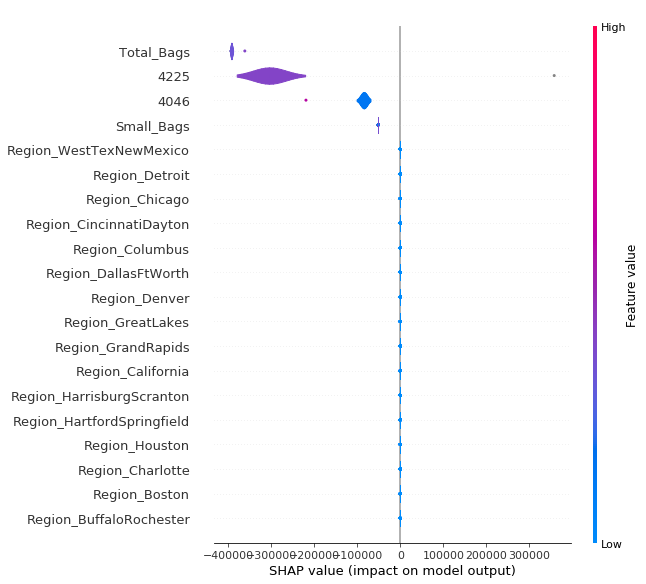

In [24]:
#Summary Plot for Albany
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_Albany,df_Albany, plot_type = 'violin')

In [25]:
mask = df_new['region'] == 'Atlanta'
shap_values_Region_Atlanta = explainerRF.shap_values(X_test[mask], approximate= True)
df_Atlanta = X_test[mask]

# SHAP Value visualization for region = Atlanta
shap.force_plot(explainerRF.expected_value, shap_values_Region_Atlanta, df_Atlanta)

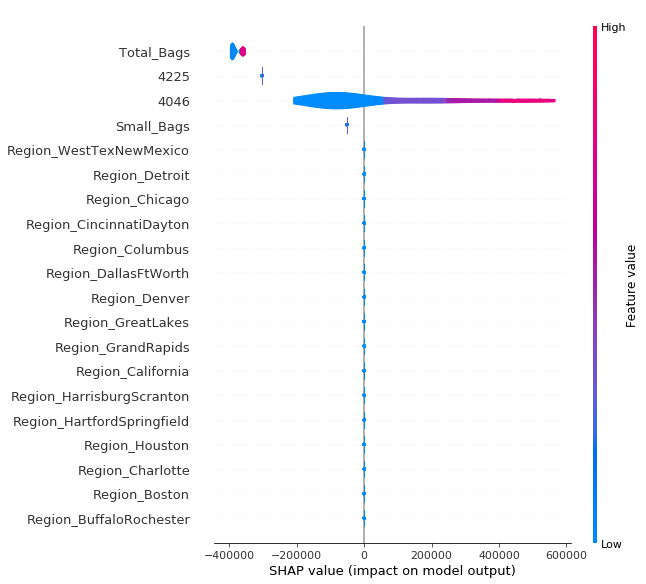

In [26]:
#Summary Plot for Albany
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_Atlanta, df_Atlanta,plot_type = 'violin')

In [27]:
mask = df_new['region'] == 'BaltimoreWashington'
shap_values_Region_BaltimoreWashington = explainerRF.shap_values(X_test[mask], approximate= True)
df_BaltimoreWashington = X_test[mask]

# SHAP Value visualization for region = BaltimoreWashington
shap.force_plot(explainerRF.expected_value, shap_values_Region_BaltimoreWashington, df_BaltimoreWashington)

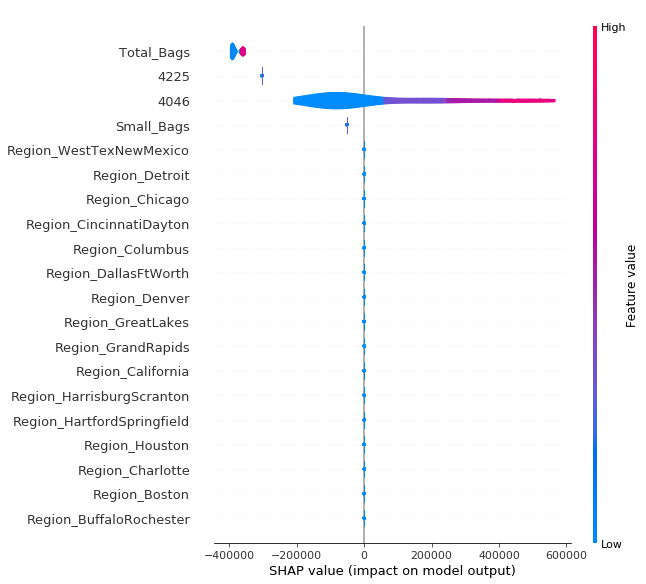

In [28]:
#Summary Plot for BaltimoreWashington
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_Atlanta, df_Atlanta,plot_type = 'violin')

In [29]:
mask = df_new['region'] == 'Boise'
shap_values_Region_Boise = explainerRF.shap_values(X_test[mask], approximate= True)
df_Boise = X_test[mask]

# SHAP Value visualization for region = Boise
shap.force_plot(explainerRF.expected_value, shap_values_Region_Boise, df_Boise)

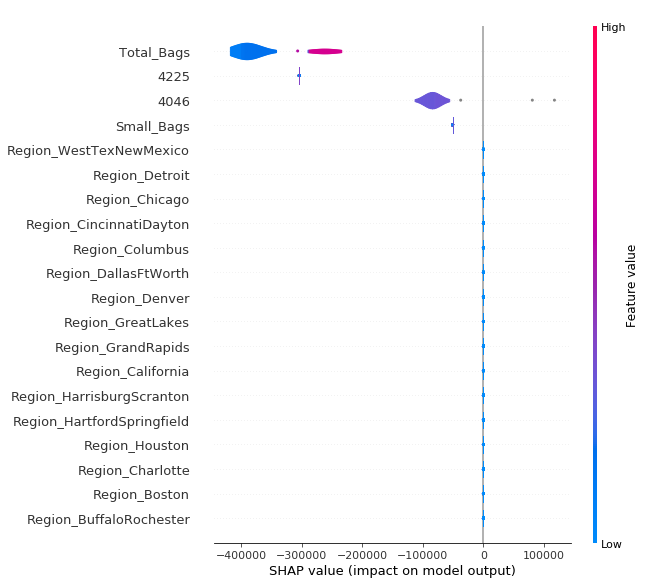

In [30]:
#Summary Plot for Boise
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_Boise, df_Boise,plot_type = 'violin')

In [31]:
mask = df_new['region'] == 'Boston'
shap_values_Region_Boston = explainerRF.shap_values(X_test[mask], approximate= True)
df_Boston = X_test[mask]

# SHAP Value visualization for region = Boston
shap.force_plot(explainerRF.expected_value, shap_values_Region_Boston, df_Boston)

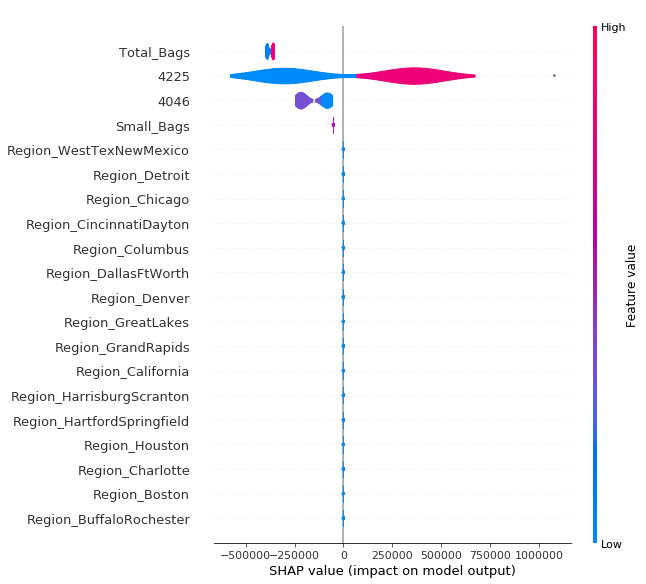

In [32]:
#Summary Plot for Boston
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_Boston, df_Boston,plot_type = 'violin')

In [33]:
mask = df_new['region'] == 'BuffaloRochester'
shap_values_Region_BuffaloRochester = explainerRF.shap_values(X_test[mask], approximate= True)
df_BuffaloRochester = X_test[mask]

# SHAP Value visualization for region = BuffaloRochester
shap.force_plot(explainerRF.expected_value, shap_values_Region_BuffaloRochester, df_BuffaloRochester)

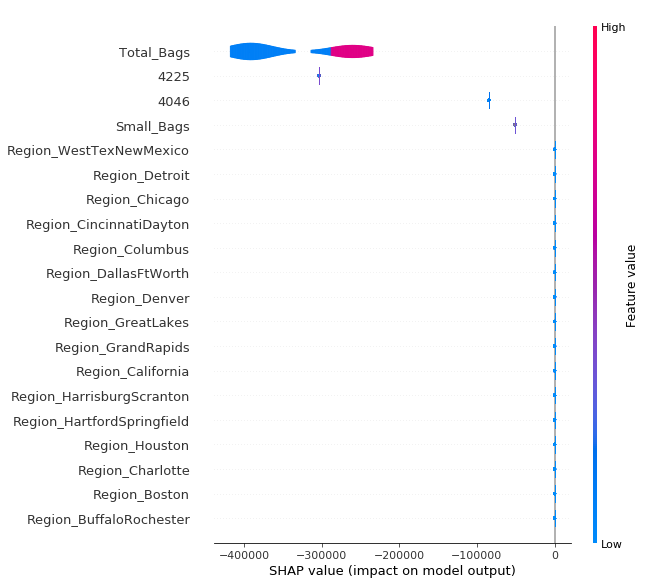

In [34]:
#Summary Plot for BuffaloRochester
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_BuffaloRochester, df_BuffaloRochester,plot_type = 'violin')

In [35]:
mask = df_new['region'] == 'California'
shap_values_Region_California = explainerRF.shap_values(X_test[mask], approximate= True)
df_California = X_test[mask]

# SHAP Value visualization for region = California
shap.force_plot(explainerRF.expected_value, shap_values_Region_California, df_California)

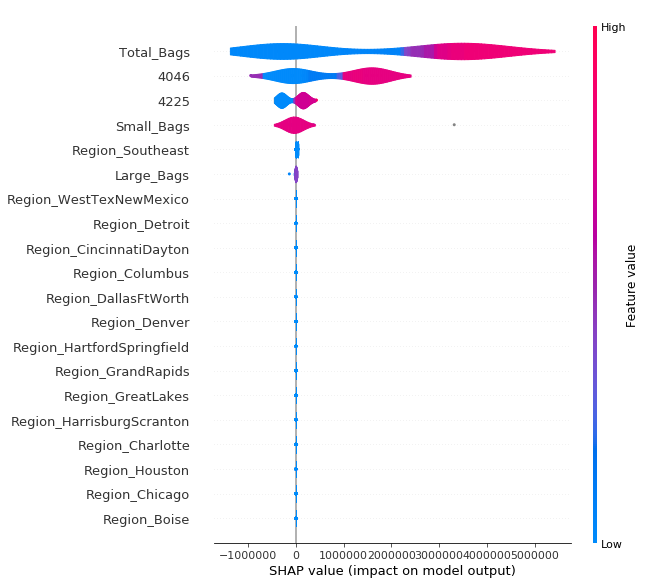

In [36]:
#Summary Plot for California
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_California, df_California,plot_type = 'violin')

In [37]:
mask = df_new['region'] == 'Charlotte'
shap_values_Region_Charlotte = explainerRF.shap_values(X_test[mask], approximate= True)
df_Charlotte = X_test[mask]

# SHAP Value visualization for region = Charlotte
shap.force_plot(explainerRF.expected_value, shap_values_Region_Charlotte, df_Charlotte)

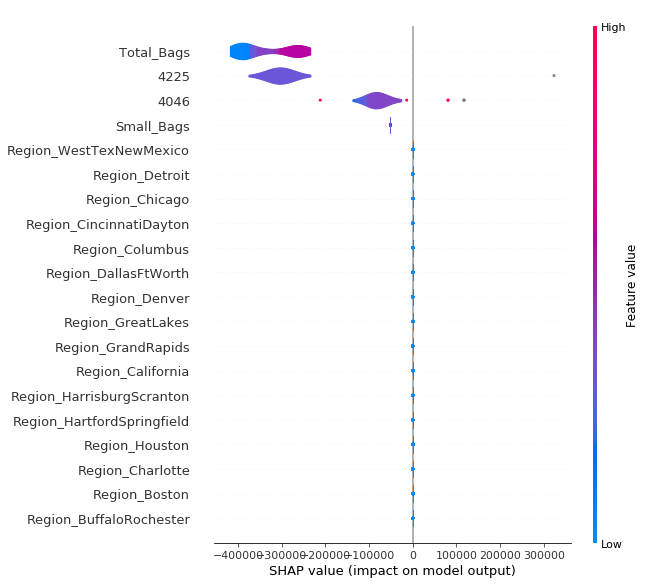

In [38]:
#Summary Plot for Charlotte
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_Charlotte, df_Charlotte,plot_type = 'violin')

In [39]:
mask = df_new['region'] == 'Chicago'
shap_values_Region_Chicago = explainerRF.shap_values(X_test[mask], approximate= True)
df_Chicago = X_test[mask]

# SHAP Value visualization for region = Chicago
shap.force_plot(explainerRF.expected_value, shap_values_Region_Chicago, df_Chicago)

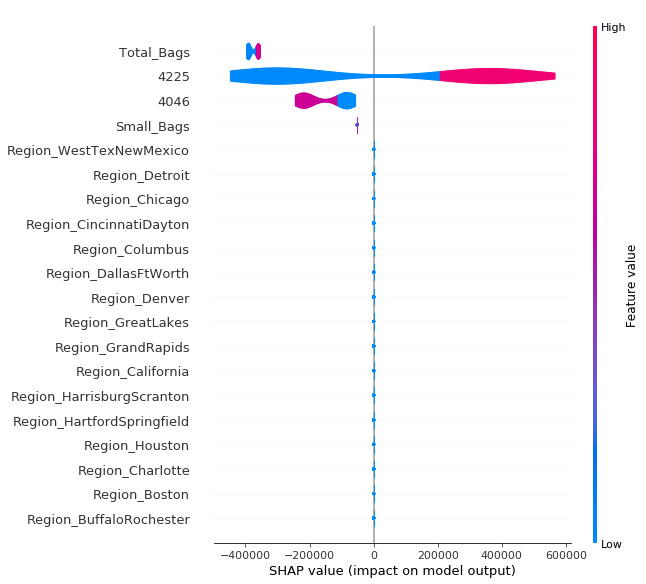

In [40]:
#Summary Plot for Chicago
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_Chicago, df_Chicago,plot_type = 'violin')

In [41]:
mask = df_new['region'] == 'CincinnatiDayton'
shap_values_Region_CincinnatiDayton = explainerRF.shap_values(X_test[mask], approximate= True)
df_CincinnatiDayton = X_test[mask]

# SHAP Value visualization for region = CincinnatiDayton
shap.force_plot(explainerRF.expected_value, shap_values_Region_CincinnatiDayton, df_CincinnatiDayton)

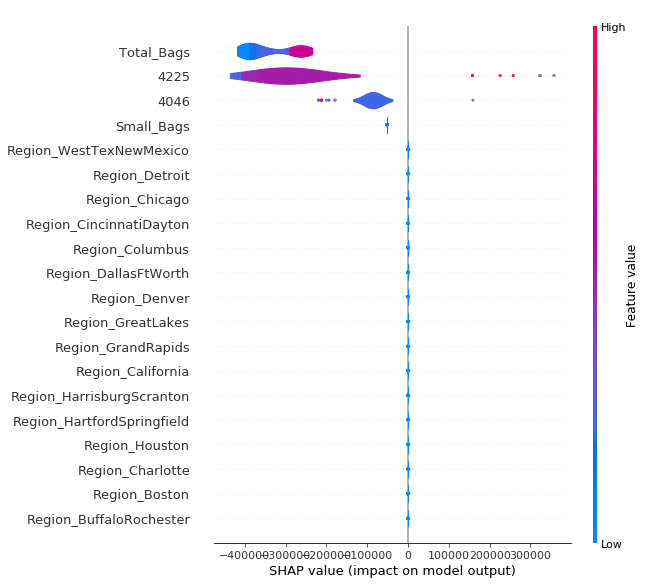

In [42]:
#Summary Plot for CincinnatiDayton
fig = plt.figure(figsize = (10, 8))
shap.summary_plot(shap_values_Region_CincinnatiDayton, df_CincinnatiDayton,plot_type = 'violin')

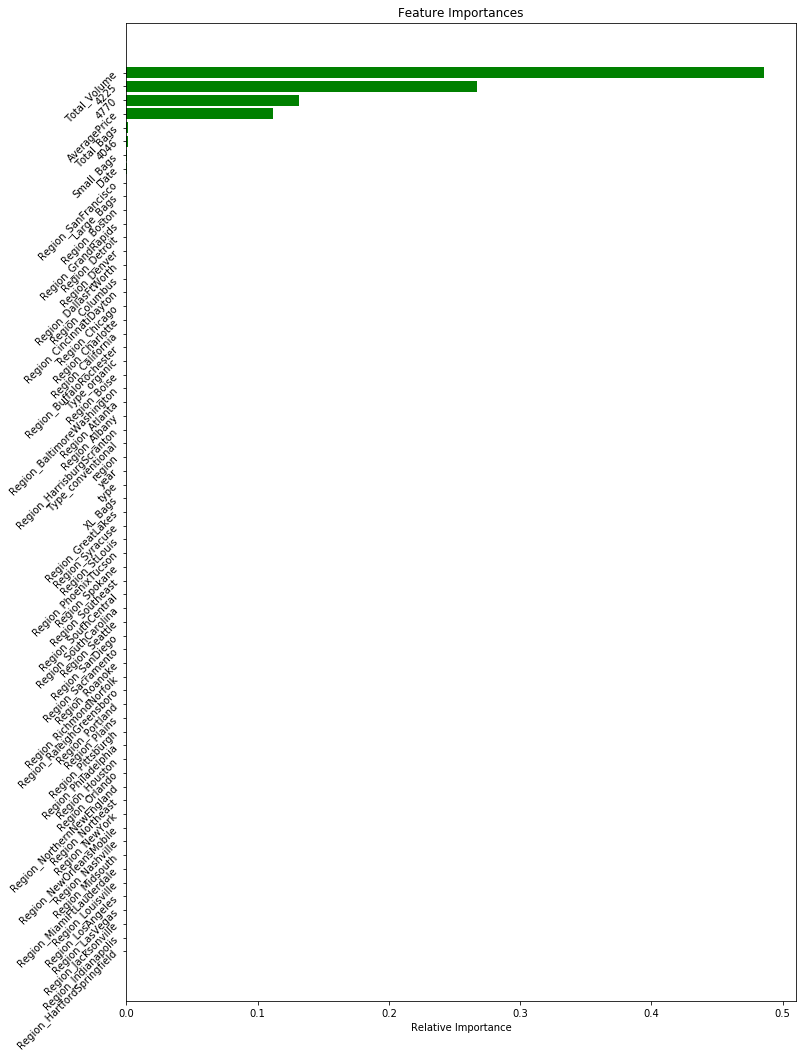

In [60]:
features=df_new.columns
importances = RFreg.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize = (12, 18))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices], rotation = 45)
plt.xlabel('Relative Importance')

plt.show()